In [ ]:
'''Pre-processing Encoders
1) label Encoders
2) One hot Encoders'''
'''a) How many unique values 
b) generate column for each unique values
c) Each row represent by binary value
d) Remove the 1st column as dummy column 
'''

In [17]:
import pandas as pd
df=pd.read_csv("Employee_Data.csv")
print(df)

     Department  WorkedHours  Certification  YearsExperience  Salary
0   Development         2300              0              1.1   39343
1       Testing         2100              1              1.3   46205
2   Development         2104              2              1.5   37731
3   UX Designer         1200              1              2.0   43525
4       Testing         1254              2              2.2   39891
5   UX Designer         1236              1              2.9   56642
6   Development         1452              2              3.0   60150
7       Testing         1789              1              3.2   54445
8   UX Designer         1645              1              3.2   64445
9   UX Designer         1258              0              3.7   57189
10      Testing         1478              3              3.9   63218
11  Development         1257              2              4.0   55794
12  Development         1596              1              4.0   56957
13      Testing         1256      

In [18]:
x=df.iloc[:,:4].values
print(x)

[['Development' 2300 0 1.1]
 ['Testing' 2100 1 1.3]
 ['Development' 2104 2 1.5]
 ['UX Designer' 1200 1 2.0]
 ['Testing' 1254 2 2.2]
 ['UX Designer' 1236 1 2.9]
 ['Development' 1452 2 3.0]
 ['Testing' 1789 1 3.2]
 ['UX Designer' 1645 1 3.2]
 ['UX Designer' 1258 0 3.7]
 ['Testing' 1478 3 3.9]
 ['Development' 1257 2 4.0]
 ['Development' 1596 1 4.0]
 ['Testing' 1256 2 4.1]
 ['UX Designer' 1489 3 4.5]
 ['Development' 1236 3 4.9]
 ['Testing' 2311 2 5.1]
 ['UX Designer' 2245 3 5.3]
 ['Development' 2365 1 5.9]
 ['Development' 1500 3 6.0]
 ['Testing' 1456 2 6.8]
 ['Testing' 1760 1 7.1]
 ['UX Designer' 2400 4 7.9]
 ['Development' 2148 3 8.2]
 ['UX Designer' 1450 2 8.7]
 ['UX Designer' 1000 4 9.0]
 ['Testing' 1540 3 9.5]
 ['Development' 1500 2 9.6]
 ['Testing' 3000 4 10.3]
 ['UX Designer' 2100 3 10.5]]


In [19]:
y=df.iloc[:,4].values
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [20]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
x[:,0]=en.fit_transform(x[:,0])
print(x)

[[0 2300 0 1.1]
 [1 2100 1 1.3]
 [0 2104 2 1.5]
 [2 1200 1 2.0]
 [1 1254 2 2.2]
 [2 1236 1 2.9]
 [0 1452 2 3.0]
 [1 1789 1 3.2]
 [2 1645 1 3.2]
 [2 1258 0 3.7]
 [1 1478 3 3.9]
 [0 1257 2 4.0]
 [0 1596 1 4.0]
 [1 1256 2 4.1]
 [2 1489 3 4.5]
 [0 1236 3 4.9]
 [1 2311 2 5.1]
 [2 2245 3 5.3]
 [0 2365 1 5.9]
 [0 1500 3 6.0]
 [1 1456 2 6.8]
 [1 1760 1 7.1]
 [2 2400 4 7.9]
 [0 2148 3 8.2]
 [2 1450 2 8.7]
 [2 1000 4 9.0]
 [1 1540 3 9.5]
 [0 1500 2 9.6]
 [1 3000 4 10.3]
 [2 2100 3 10.5]]


In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2, random_state=1)

from sklearn.linear_model import LinearRegression

rg=LinearRegression()
rg.fit(x_train, y_train)
y_pred=rg.predict(x_test)

from sklearn.metrics import mean_squared_error

msc=mean_squared_error(y_test, y_pred)

import numpy as np

rmsc=np.sqrt(msc)
m=rg.coef_
print(m)
c=rg.intercept_
print(c)

[ 8.71284178e+02  3.53182230e+00 -6.26079330e+02  9.33104791e+03]
19904.263958520183


In [24]:
s=rg.predict([[1,2500,3,4]])
print("Predict Salary: ",s)

Predict Salary:  [65051.05754289]


In [25]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")
print(df)

                   Position  Level  Salary
0         Software Engineer      1   22000
1     Sr. Software Engineer      2   24000
2           Technology Lead      3   30000
3               Team Leader      4   38000
4                   Manager      5   50000
5            Senior Manager      6   75000
6  Associate Vice President      7  110000
7            Vice President      8  170000
8                 President      9  260000
9                       CEO     10  480000


In [26]:
x=df.iloc[:,1:2].values
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [27]:
y=df.iloc[:,2].values
print(y)

[ 22000  24000  30000  38000  50000  75000 110000 170000 260000 480000]


In [29]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x,y)
S=rg.predict([[8.3]])
print(S)

[239851.51515152]


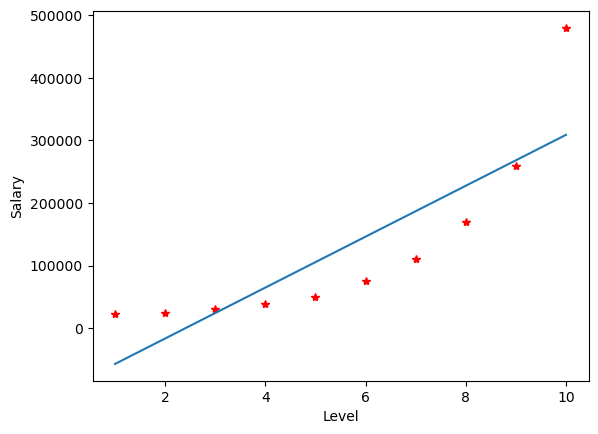

In [33]:
import matplotlib.pyplot as plt
plt.plot(x,y,'r*')
p=rg.predict(x)
plt.plot(x,p)
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [35]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
x_poly=pf.fit_transform(x)
print(x_poly)


[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [37]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]
[189117.70166079]


In [38]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=1)
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[239851.51515152]


In [39]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]
[236068.33333333]


In [40]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=3)
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]
[204584.65034965]


In [41]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5) #For that time gives best feed solution
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]
[186347.34597852]


In [42]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=6)
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
  1.00000e+00]
 [1.00000e+00 2.00000e+00 4.00000e+00 8.00000e+00 1.60000e+01 3.20000e+01
  6.40000e+01]
 [1.00000e+00 3.00000e+00 9.00000e+00 2.70000e+01 8.10000e+01 2.43000e+02
  7.29000e+02]
 [1.00000e+00 4.00000e+00 1.60000e+01 6.40000e+01 2.56000e+02 1.02400e+03
  4.09600e+03]
 [1.00000e+00 5.00000e+00 2.50000e+01 1.25000e+02 6.25000e+02 3.12500e+03
  1.56250e+04]
 [1.00000e+00 6.00000e+00 3.60000e+01 2.16000e+02 1.29600e+03 7.77600e+03
  4.66560e+04]
 [1.00000e+00 7.00000e+00 4.90000e+01 3.43000e+02 2.40100e+03 1.68070e+04
  1.17649e+05]
 [1.00000e+00 8.00000e+00 6.40000e+01 5.12000e+02 4.09600e+03 3.27680e+04
  2.62144e+05]
 [1.00000e+00 9.00000e+00 8.10000e+01 7.29000e+02 6.56100e+03 5.90490e+04
  5.31441e+05]
 [1.00000e+00 1.00000e+01 1.00000e+02 1.00000e+03 1.00000e+04 1.00000e+05
  1.00000e+06]]
[188717.55643485]


In [43]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=7)
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
  3.200000e+01 6.400000e+01 1.280000e+02]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01
  2.430000e+02 7.290000e+02 2.187000e+03]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01 2.560000e+02
  1.024000e+03 4.096000e+03 1.638400e+04]
 [1.000000e+00 5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02
  3.125000e+03 1.562500e+04 7.812500e+04]
 [1.000000e+00 6.000000e+00 3.600000e+01 2.160000e+02 1.296000e+03
  7.776000e+03 4.665600e+04 2.799360e+05]
 [1.000000e+00 7.000000e+00 4.900000e+01 3.430000e+02 2.401000e+03
  1.680700e+04 1.176490e+05 8.235430e+05]
 [1.000000e+00 8.000000e+00 6.400000e+01 5.120000e+02 4.096000e+03
  3.276800e+04 2.621440e+05 2.097152e+06]
 [1.000000e+00 9.000000e+00 8.100000e+01 7.290000e+02 6.561000e+03
  5.904900e+04 5.314410e+05 4.782969e+06]
 [1.000000e+00 1.00

In [44]:
import pandas as pd
df=pd.read_csv("Position_Salaries.csv")

x=df.iloc[:,1:2].values
y=df.iloc[:,2].values

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=8)
x_poly=pf.fit_transform(x)
print(x_poly)

from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(x_poly,y)
S=rg.predict(pf.transform([[8.3]]))
print(S)

[[1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00]
 [1.0000000e+00 2.0000000e+00 4.0000000e+00 8.0000000e+00 1.6000000e+01
  3.2000000e+01 6.4000000e+01 1.2800000e+02 2.5600000e+02]
 [1.0000000e+00 3.0000000e+00 9.0000000e+00 2.7000000e+01 8.1000000e+01
  2.4300000e+02 7.2900000e+02 2.1870000e+03 6.5610000e+03]
 [1.0000000e+00 4.0000000e+00 1.6000000e+01 6.4000000e+01 2.5600000e+02
  1.0240000e+03 4.0960000e+03 1.6384000e+04 6.5536000e+04]
 [1.0000000e+00 5.0000000e+00 2.5000000e+01 1.2500000e+02 6.2500000e+02
  3.1250000e+03 1.5625000e+04 7.8125000e+04 3.9062500e+05]
 [1.0000000e+00 6.0000000e+00 3.6000000e+01 2.1600000e+02 1.2960000e+03
  7.7760000e+03 4.6656000e+04 2.7993600e+05 1.6796160e+06]
 [1.0000000e+00 7.0000000e+00 4.9000000e+01 3.4300000e+02 2.4010000e+03
  1.6807000e+04 1.1764900e+05 8.2354300e+05 5.7648010e+06]
 [1.0000000e+00 8.0000000e+00 6.4000000e+01 5.1200000e+02 4.0960000e+03
  3.2768000

# SUPERVISED LEARNING

In [ ]:
'''Classification
--> Output values are discrete type
K-NN- K neatrest neighbours
SVM- Support vector Machine
Naive Bayes
Descision Tree
Random forest
Logistic Regression'''

In [1]:
import pandas as pd
df=pd.read_csv("Social_Network_Ads.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [2]:
x=df.iloc[:,[2,3]].values
print(x)


[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [3]:
y=df.iloc[:,4].values
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=1)
print(x_train)
print(x_test)

[[    20  49000]
 [    46  88000]
 [    31  34000]
 [    47  30000]
 [    35  50000]
 [    39  96000]
 [    33 113000]
 [    49  86000]
 [    45  79000]
 [    44  39000]
 [    41  59000]
 [    42  53000]
 [    35  73000]
 [    41  72000]
 [    27  96000]
 [    30 116000]
 [    41  52000]
 [    41  52000]
 [    20  82000]
 [    46  41000]
 [    27  31000]
 [    35  71000]
 [    49  28000]
 [    35  91000]
 [    37  75000]
 [    32 117000]
 [    36  75000]
 [    20  86000]
 [    38  50000]
 [    49  36000]
 [    40  65000]
 [    37  77000]
 [    60  46000]
 [    48 138000]
 [    40  71000]
 [    36  63000]
 [    26  81000]
 [    33  31000]
 [    41  51000]
 [    46  74000]
 [    18  82000]
 [    37  33000]
 [    35  53000]
 [    28  59000]
 [    37  71000]
 [    18  44000]
 [    38  61000]
 [    35  65000]
 [    31  66000]
 [    47  25000]
 [    42 104000]
 [    19  19000]
 [    21  72000]
 [    28  32000]
 [    52 150000]
 [    53 104000]
 [    25  80000]
 [    26  72000]
 [    26  1500

In [ ]:
PREPROCESSING
*Feature Scalling*
1) Standard scaler
2) MinMax Scaler
Xscaled = [Xi-Mean(x)]/[stdv(x)]

Xscaled = [Xi-mean(x)]/[max(x)-min(x)]


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
print(x_train)

[[-1.68062015e+00 -5.92416706e-01]
 [ 8.69241193e-01  5.63566526e-01]
 [-6.01832657e-01 -1.03702564e+00]
 [ 9.67312783e-01 -1.15558802e+00]
 [-2.09546297e-01 -5.62776110e-01]
 [ 1.82740063e-01  8.00691292e-01]
 [-4.05689477e-01  1.30458142e+00]
 [ 1.16345596e+00  5.04285335e-01]
 [ 7.71169603e-01  2.96801165e-01]
 [ 6.73098013e-01 -8.88822663e-01]
 [ 3.78883243e-01 -2.96010749e-01]
 [ 4.76954833e-01 -4.73854323e-01]
 [-2.09546297e-01  1.18957591e-01]
 [ 3.78883243e-01  8.93169951e-02]
 [-9.94119017e-01  8.00691292e-01]
 [-6.99904247e-01  1.39350321e+00]
 [ 3.78883243e-01 -5.03494919e-01]
 [ 3.78883243e-01 -5.03494919e-01]
 [-1.68062015e+00  3.85722952e-01]
 [ 8.69241193e-01 -8.29541472e-01]
 [-9.94119017e-01 -1.12594743e+00]
 [-2.09546297e-01  5.96763994e-02]
 [ 1.16345596e+00 -1.21486922e+00]
 [-2.09546297e-01  6.52488313e-01]
 [-1.34031173e-02  1.78238782e-01]
 [-5.03761067e-01  1.42314380e+00]
 [-1.11474707e-01  1.78238782e-01]
 [-1.68062015e+00  5.04285335e-01]
 [ 8.46684727e-02 -5

In [11]:
x_test=sc.transform(x_test)
print(x_test)

[[-0.11147471 -1.06666624]
 [ 0.18274006 -0.23672956]
 [-0.11147471  1.4527844 ]
 [ 0.18274006  1.57134678]
 [-1.09219061  1.4527844 ]
 [ 0.08466847 -0.11816717]
 [-1.68062015 -0.97774445]
 [ 1.16345596  0.59320712]
 [-0.60183266 -1.51127517]
 [ 1.06538437  2.1345181 ]
 [-0.30761789  0.089317  ]
 [ 0.18274006  0.11895759]
 [-0.2095463   0.089317  ]
 [ 1.06538437  1.83811214]
 [ 1.55574232  0.38572295]
 [ 1.84995709  1.89739333]
 [ 2.24224345  0.41536355]
 [-0.99411902 -0.32565134]
 [-0.89604743  0.53392593]
 [ 2.24224345  0.97853487]
 [ 0.28081165  0.17823878]
 [ 1.26152755  0.56356653]
 [ 0.67309801  2.07523691]
 [ 0.96731278 -0.77026028]
 [ 0.7711696  -1.27415041]
 [-1.09219061 -1.60019696]
 [ 2.04610027 -0.6516979 ]
 [ 1.16345596  0.14859819]
 [ 1.55574232 -1.03702564]
 [ 1.45767073  1.33422201]
 [ 0.18274006 -0.79990088]
 [-1.77869174  0.20787938]
 [-1.87676333  0.50428533]
 [ 1.94802868  0.14859819]
 [-0.99411902  0.44500414]
 [-0.69990425  0.32644176]
 [-1.48447697 -1.51127517]
 

In [1]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(weights='distance')
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
print(y_pred)


NameError: name 'x_train' is not defined

In [15]:
print(y_test) 

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0]


# Confusion Matrix


In [17]:
y_pred=kn.predict(x_test)
print(y_pred)
print(y_test)

[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0]
[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0]


In [18]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_pred)
print(c)

[[50  8]
 [ 4 38]]


In [19]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)

0.88


In [1]:
# Import the turtle library for
# drawing the required curve
import turtle as tt
 
# Set the background color as black,
# pensize as 2 and speed of drawing
# curve as 10(relative)
tt.bgcolor('black')
tt.pensize(2)
tt.speed(10)
 
# Iterate six times in total
for i in range(6):
   
      # Choose your color combination
    for color in ('red', 'magenta', 'blue',
                  'cyan', 'green', 'white',
                  'yellow'):
        tt.color(color)
         
        # Draw a circle of chosen size, 100 here
        tt.circle(100)
         
        # Move 10 pixels left to draw another circle
        tt.left(10)
     
    # Hide the cursor(or turtle) which drew the circle
    tt.hideturtle()

Terminator: 